In [ ]:
#liberando Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.patches as patches

In [ ]:
parameter = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}

In [ ]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.flip(np.unique(y_true)))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.flip(np.unique(y_true)), columns=np.flip(np.unique(y_true)))
    cm.index.name = 'Real'
    cm.columns.name = 'Valor Predito'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
path_dataset = '/content/drive/My Drive/UFPR/aplicacao_ciencia_dados/trabalho_disciplina/dataset/training_dataset.csv'
data = pd.read_csv(path_dataset)

In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]

In [ ]:
X_tree = X[['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor','Links_in_tags', 'web_traffic']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.2, random_state=42)

In [ ]:
skf = StratifiedKFold(n_splits=5)

#Curva RoC Cv Treino

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.set_params(**parameter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

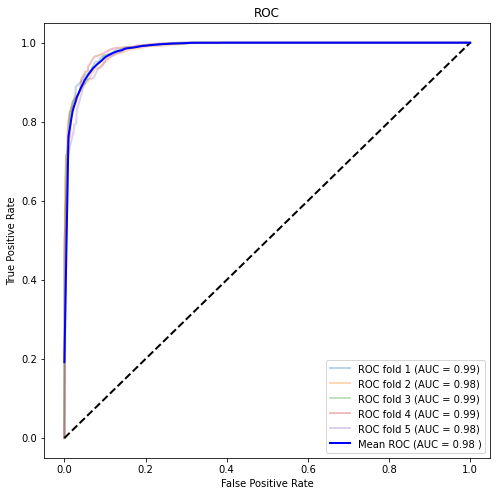

In [ ]:
fig1 = plt.figure(figsize=[8,8])
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
x_np = X_train.to_numpy()
y_np = y_train.to_numpy().ravel()
i = 1
for train,test in skf.split(x_np,y_np):
    prediction = clf.fit(x_np[train],y_np[train]).predict_proba(x_np[test])
    fpr, tpr, t = roc_curve(y_np[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

#Matriz de Confunsão

In [ ]:
CV = skf.split(x_np, y_np)

In [ ]:
clf_2 = RandomForestClassifier(random_state=42)

In [ ]:
clf_2.set_params(**parameter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

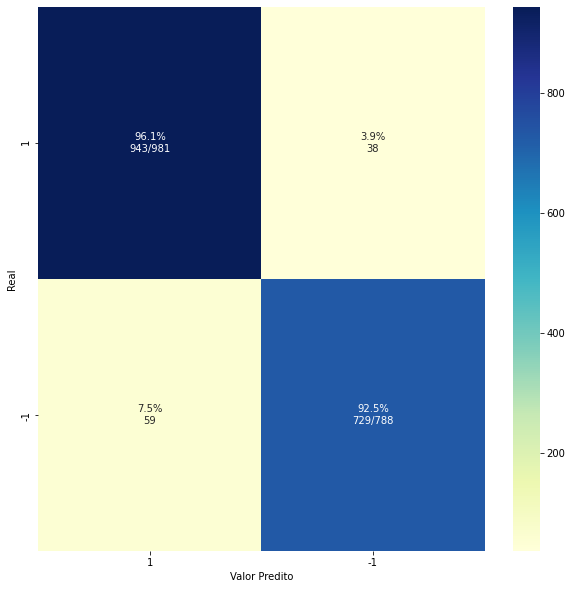

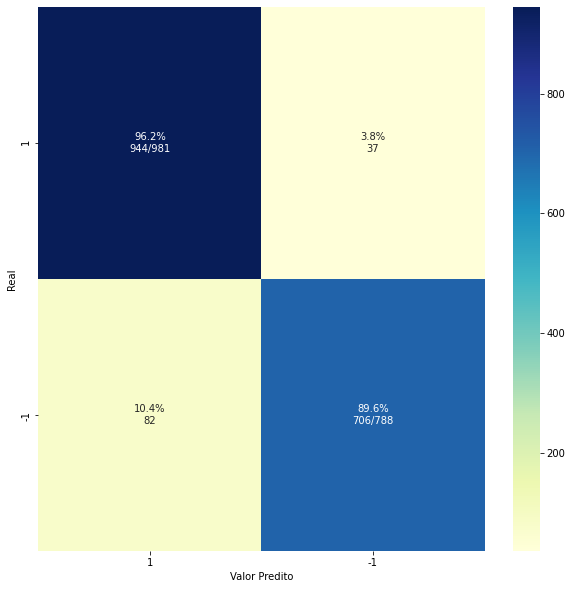

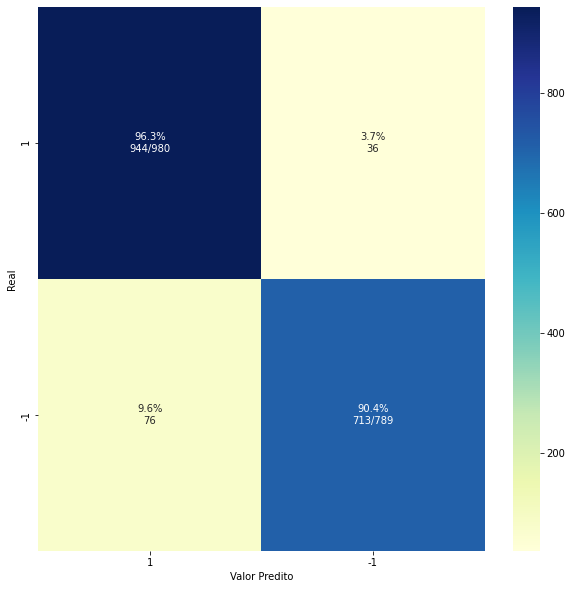

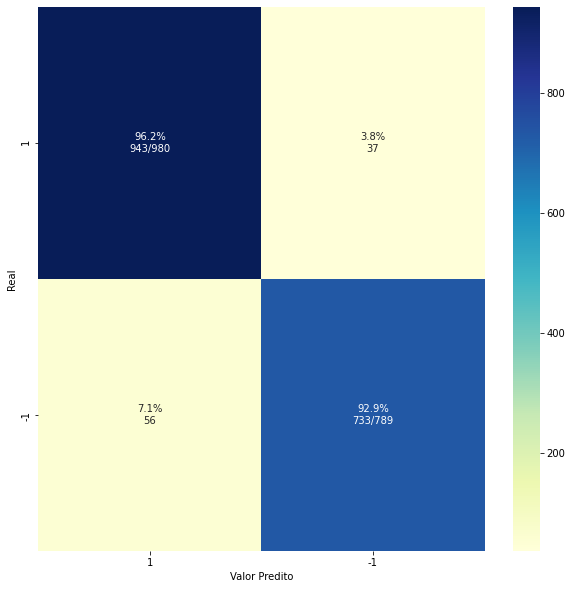

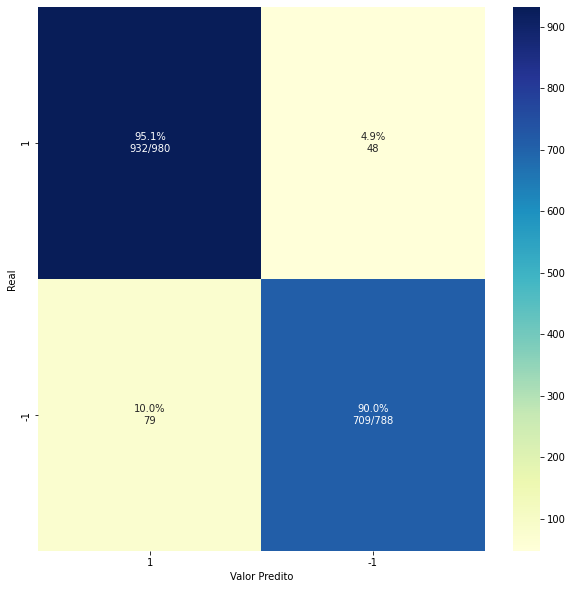

In [ ]:
for train, test in CV:
  clf_2.fit(x_np[train],y_np[train])
  predict=clf.predict(x_np[test])
  plot_cm(y_np[test],predict)

#Metricas

In [ ]:
model_random = RandomForestClassifier(random_state=42)

In [ ]:
model_random.set_params(**parameter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
result_random = cross_validate(model_random, X_train, y_train, scoring={'erro': make_scorer(mean_absolute_error), 'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score), 'f1_score' : make_scorer(f1_score), 'accuracy_score': make_scorer(accuracy_score), 'matthews_corrcoef':make_scorer(matthews_corrcoef)}, cv=skf, n_jobs=-1)

In [ ]:
pd_result_random=pd.DataFrame(result_random)

In [ ]:
pd_result_random

,fit_time,score_time,test_erro,test_precision,test_recall,test_f1_score,test_accuracy_score,test_matthews_corrcoef
0,0.247295,0.034469,0.122103,0.940464,0.950051,0.945233,0.938949,0.876329
1,0.246577,0.032712,0.143584,0.913760,0.961264,0.936910,0.928208,0.855231
2,0.247916,0.034285,0.122103,0.926614,0.966327,0.946054,0.938949,0.876836
3,0.254506,0.036225,0.105144,0.942173,0.964286,0.953101,0.947428,0.893624
4,0.161895,0.021827,0.143665,0.921860,0.951020,0.936213,0.928167,0.854600


In [ ]:
pd_result_random.mean()

fit_time                  0.231638
score_time                0.031904
test_erro                 0.127320
test_precision            0.928974
test_recall               0.958590
test_f1_score             0.943502
test_accuracy_score       0.936340
test_matthews_corrcoef    0.871324
dtype: float64